<a href="https://colab.research.google.com/github/renya1993/competition_practice_/blob/main/keras_%E3%83%84%E3%82%A4%E3%83%83%E3%82%BF%E3%83%BC%E3%81%AE%E3%83%9C%E3%83%83%E3%83%88%E3%81%8B%E3%81%AE%E5%88%A4%E6%96%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

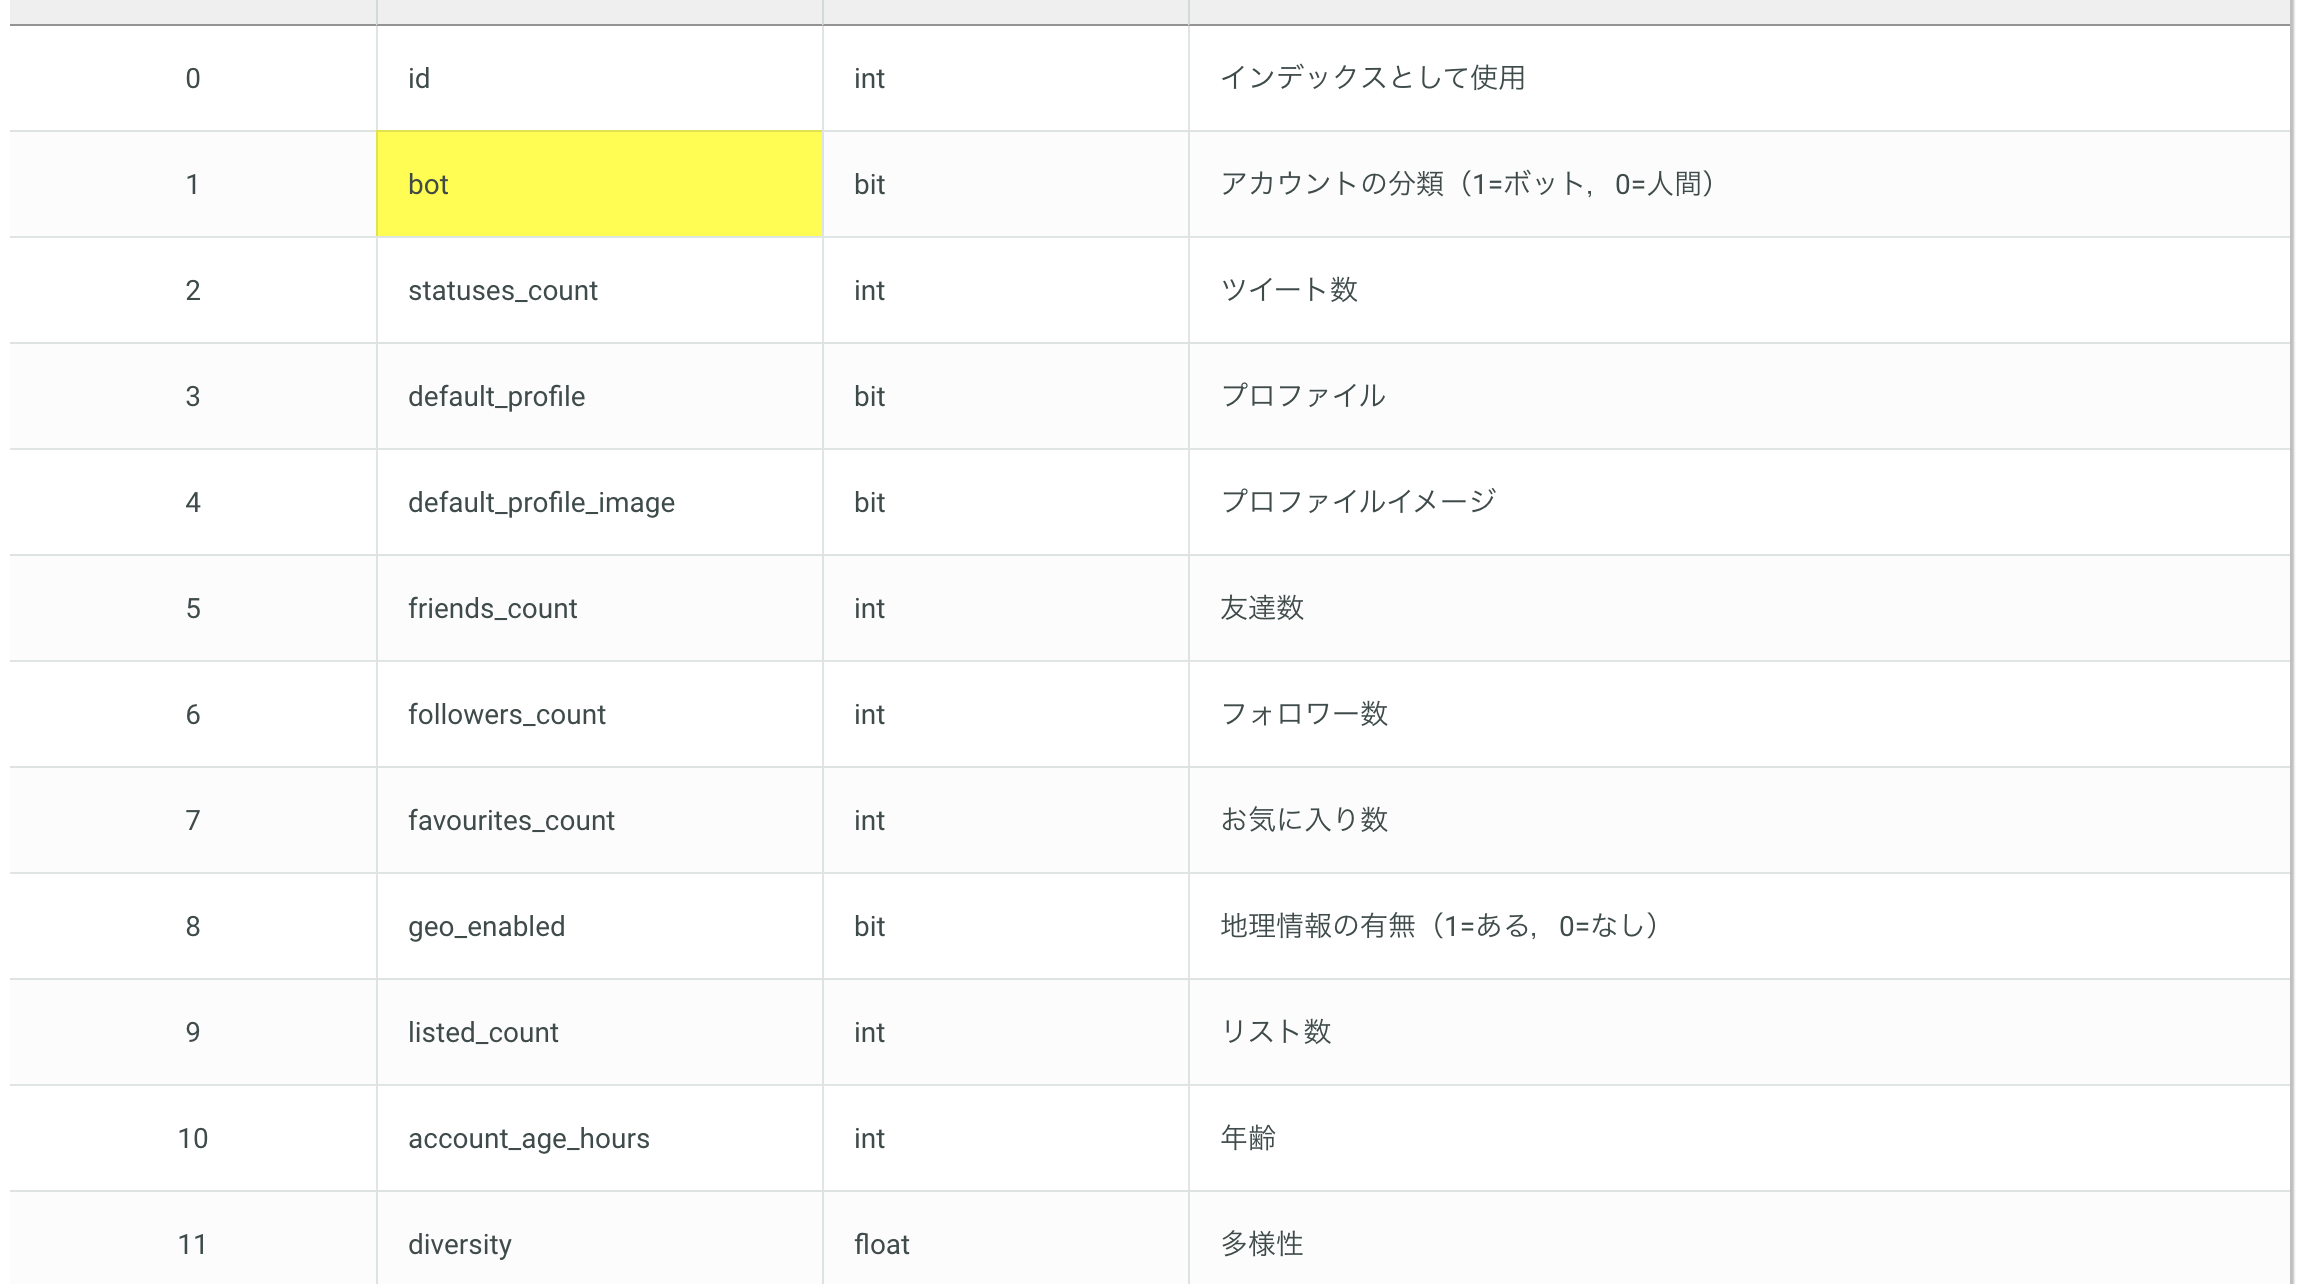

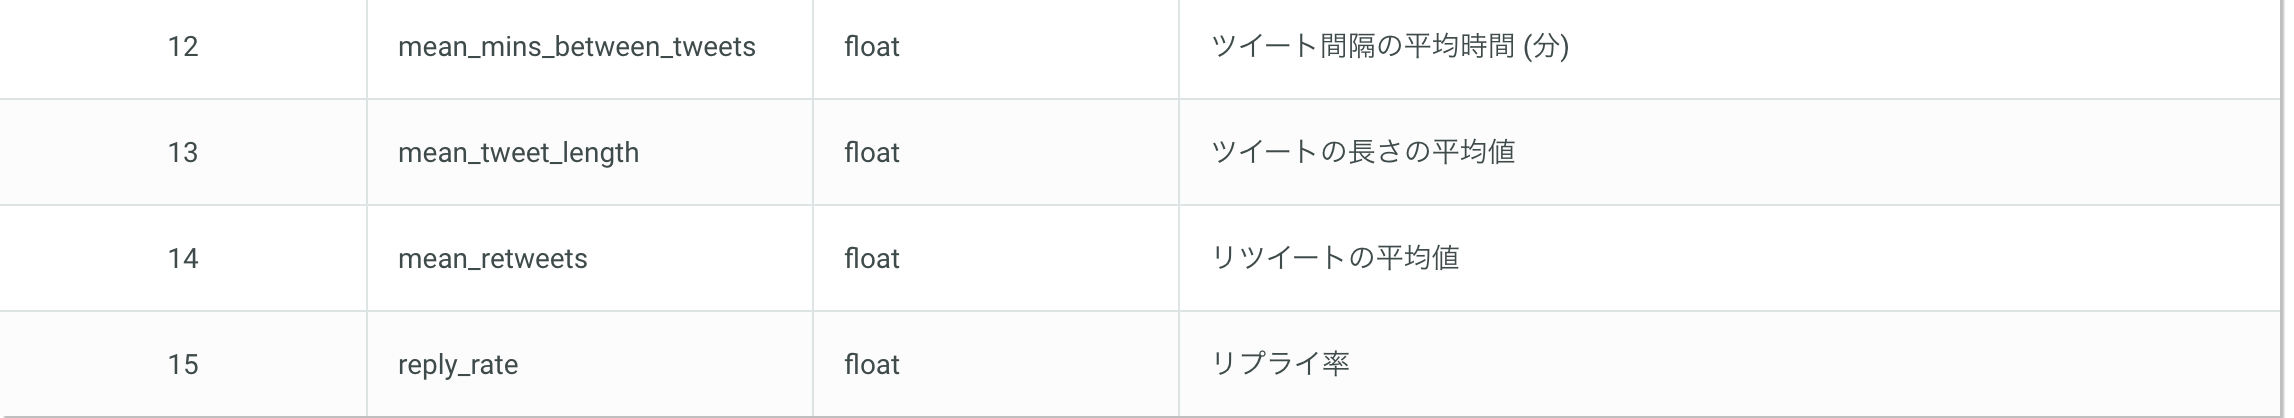

In [1]:
import pandas as pd
import numpy as np

In [2]:
test = pd.read_csv("/content/drive/MyDrive/competition/ツイッターのボット/test.tsv",index_col="id",sep='\t')
test.head()

,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
id,,,,,,,,,,,,,,
1,1990,0,0,546,1225,133,0,53,21007,0.869048,2208.218750,90.363636,2.5,0.121212
4,601,0,0,948,368,212,0,32,26934,0.612211,292.957143,65.829787,2.0,0.609929
5,17,0,0,301,39,1,0,5,25497,0.879310,116383.545455,98.666667,1.0,0.083333
6,271,0,0,126,62,3,0,2,70240,0.741379,24589.039682,75.204724,3.0,0.157480
8,8,1,0,960,146,24,0,0,12162,0.500000,32.428571,35.750000,1.0,0.250000


In [3]:
train = pd.read_csv("/content/drive/MyDrive/competition/ツイッターのボット/train.tsv",index_col="id",sep='\t')
train.head()

,bot,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
id,,,,,,,,,,,,,,,
0,0,715,0,0,423,206,150,1,34,36981,0.684902,3958.863636,97.513514,1.473684,0.504505
2,0,2151,0,0,1457,1321,1704,1,90,35603,0.704787,2746.533708,69.988827,3.814815,0.553073
3,0,439,0,0,691,213,5,0,15,38432,0.528857,11005.031847,75.101266,1.142857,0.158228
7,0,28,1,0,285,31,0,0,1,4898,0.810427,6495.666667,93.029412,3.000000,0.029412
12,0,40,0,0,907,60,1013,1,2,47238,0.831579,112167.300000,79.142857,1.000000,0.047619


In [4]:
default_profile=pd.get_dummies(train["default_profile"], prefix='default_profile')
train2 = pd.concat([train, default_profile], axis=1)
train2

,bot,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate,default_profile_0,default_profile_1
id,,,,,,,,,,,,,,,,,
0,0,715,0,0,423,206,150,1,34,36981,0.684902,3958.863636,97.513514,1.473684,0.504505,1,0
2,0,2151,0,0,1457,1321,1704,1,90,35603,0.704787,2746.533708,69.988827,3.814815,0.553073,1,0
3,0,439,0,0,691,213,5,0,15,38432,0.528857,11005.031847,75.101266,1.142857,0.158228,1,0
7,0,28,1,0,285,31,0,0,1,4898,0.810427,6495.666667,93.029412,3.000000,0.029412,0,1
12,0,40,0,0,907,60,1013,1,2,47238,0.831579,112167.300000,79.142857,1.000000,0.047619,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,0,107,0,0,153,21,4,0,1,38430,0.713376,8918.023256,87.459770,1.000000,0.022989,1,0
3170,0,849,1,0,241,198,6,0,35,25466,0.599379,1731.907407,99.854545,6.466667,0.563636,0,1
3171,0,207,1,0,1996,192,0,0,9,10704,0.661232,2035.020202,94.381910,1.312500,0.005025,0,1


In [5]:
train = pd.get_dummies(train, columns=['default_profile', 'default_profile_image',"geo_enabled"])
train

,bot,statuses_count,friends_count,followers_count,favourites_count,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate,default_profile_0,default_profile_1,default_profile_image_0,default_profile_image_1,geo_enabled_0,geo_enabled_1
id,,,,,,,,,,,,,,,,,,
0,0,715,423,206,150,34,36981,0.684902,3958.863636,97.513514,1.473684,0.504505,1,0,1,0,0,1
2,0,2151,1457,1321,1704,90,35603,0.704787,2746.533708,69.988827,3.814815,0.553073,1,0,1,0,0,1
3,0,439,691,213,5,15,38432,0.528857,11005.031847,75.101266,1.142857,0.158228,1,0,1,0,1,0
7,0,28,285,31,0,1,4898,0.810427,6495.666667,93.029412,3.000000,0.029412,0,1,1,0,1,0
12,0,40,907,60,1013,2,47238,0.831579,112167.300000,79.142857,1.000000,0.047619,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,0,107,153,21,4,1,38430,0.713376,8918.023256,87.459770,1.000000,0.022989,1,0,1,0,1,0
3170,0,849,241,198,6,35,25466,0.599379,1731.907407,99.854545,6.466667,0.563636,0,1,1,0,1,0
3171,0,207,1996,192,0,9,10704,0.661232,2035.020202,94.381910,1.312500,0.005025,0,1,1,0,1,0


In [32]:
test = pd.get_dummies(test, columns=['default_profile', 'default_profile_image',"geo_enabled"])


In [6]:
train["bot"].sum()

243

#データ型をどうするかを考える

In [7]:
print("------------------train-------------------")
train.info()
print("------------------test-------------------")
test.info()


------------------train-------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1588 entries, 0 to 3175
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bot                       1588 non-null   int64  
 1   statuses_count            1588 non-null   int64  
 2   friends_count             1588 non-null   int64  
 3   followers_count           1588 non-null   int64  
 4   favourites_count          1588 non-null   int64  
 5   listed_count              1588 non-null   int64  
 6   account_age_hours         1588 non-null   int64  
 7   diversity                 1588 non-null   float64
 8   mean_mins_between_tweets  1588 non-null   float64
 9   mean_tweet_length         1588 non-null   float64
 10  mean_retweets             1588 non-null   float64
 11  reply_rate                1588 non-null   float64
 12  default_profile_0         1588 non-null   uint8  
 13  default_profile_1   

#テストデータと分ける

In [8]:
train_ = train.drop(columns="bot")
test_ = train["bot"]

#Nullがあるか調べる

In [9]:
for i in test.columns.tolist():
  print(test[i].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [10]:
test_.shape

(1588,)

#標準化する

In [33]:
def normalization(x,y):
  return (x - y['mean']) / y['std']

#学習データに対して
train_stats = train_.describe()
train_stats_T = train_stats.transpose()
normed_train_X = normalization(train_,train_stats_T)

#テストデータに対して
test_stats = test.describe()
test_stats_T = test_stats.transpose()
normed_test = normalization(test,test_stats_T)

In [34]:
normed_train_X.shape

(1588, 17)

#kerasで実装する

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(normed_train_X, test_, test_size = 0.2,random_state=0)

In [13]:
x_test.values.shape

(318, 17)

In [14]:
y_test_numpy = y_test.values.reshape(-1,1)
y_test_numpy.shape

(318, 1)

In [15]:
x_train.head()

,statuses_count,friends_count,followers_count,favourites_count,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate,default_profile_0,default_profile_1,default_profile_image_0,default_profile_image_1,geo_enabled_0,geo_enabled_1
id,,,,,,,,,,,,,,,,,
420,-0.367582,-0.108415,-0.084739,-0.208121,-0.218928,-0.874055,0.124352,-0.002528,-0.369911,-0.077896,0.308675,0.646215,-0.646215,0.178378,-0.178378,0.900115,-0.900115
1846,-0.371318,-0.051341,-0.083147,-0.192579,-0.224346,0.118435,0.950537,0.327933,0.498601,0.055512,0.628665,0.646215,-0.646215,0.178378,-0.178378,0.900115,-0.900115
114,1.678522,-0.032290,-0.030331,0.176426,0.111573,-0.564931,0.317962,-0.240858,-1.774171,-0.041408,0.383967,0.646215,-0.646215,0.178378,-0.178378,-1.110269,1.110269
2271,-0.383128,-0.063745,-0.081142,-0.209298,-0.218928,0.547063,1.873106,1.295854,0.545787,-0.081316,0.628665,0.646215,-0.646215,0.178378,-0.178378,0.900115,-0.900115
1189,-0.363966,-0.123656,-0.084297,0.123677,-0.216219,0.475709,0.359659,0.088777,0.416894,-0.017789,0.916387,-1.546498,1.546498,0.178378,-0.178378,0.900115,-0.900115


In [ ]:
y_train.value_counts()

0    1073
1     197
Name: bot, dtype: int64

In [105]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

# モデルの作成
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1]))    # 入力層17ノード, 隠れ層に3ノード, 全結合
model.add(Activation("relu"))    # 活性化関数はsigmoid
model.add(Dense(64)) # 出力層2ノード,全結合
model.add(Activation("relu"))    # 活性化関数はsigmoid
model.add(Dense(32)) # 出力層2ノード,全結合
model.add(Activation("relu"))    # 活性化関数はsigmoid
model.add(Dense(16)) # 出力層2ノード,全結合
model.add(Activation("relu"))    # 活性化関数はsigmoid
model.add(Dense(8)) # 出力層2ノード,全結合
model.add(Activation("relu"))    # 活性化関数はsigmoid
model.add(Dense(1)) # 出力層2ノード,全結合
model.add(Activation("sigmoid")) 

In [106]:
import tensorflow as tf

optimizer_ADAM =  tf.keras.optimizers.Adam(0.000005)

model.compile(loss="binary_crossentropy",   # 誤差関数
                      optimizer=optimizer_ADAM,     # 最適化手法
                      metrics=['accuracy'])

In [109]:
#history = model.fit(normed_train_X, test_, epochs=100, batch_size=32,validation_split=0.2) # 学習
history = model.fit(normed_train_X, test_, epochs=100, batch_size=32) # 学習

Epoch 1/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8766
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3941 - accuracy: 0.8766
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8766
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.8766
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.8766
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.8766
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3819 - accuracy: 0.8766
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3796 - accuracy: 0.8766
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3774 - accuracy: 0.8766
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8766
Epoch 11/

No handles with labels found to put in legend.
No handles with labels found to put in legend.


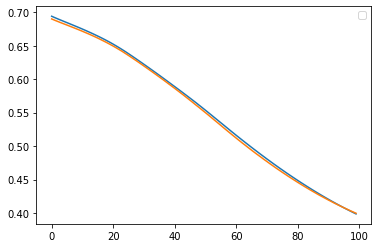

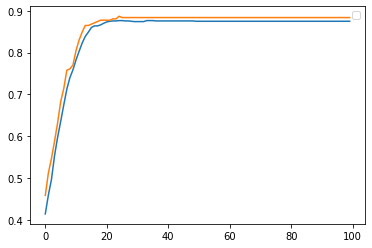

In [108]:
import matplotlib.pyplot as  plt
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.plot(hist['epoch'], hist['loss'])
  plt.plot(hist['epoch'], hist['val_loss'])

  plt.legend()
  
  plt.figure()

  plt.plot(hist['epoch'], hist['accuracy'])
  plt.plot(hist['epoch'], hist['val_accuracy'])

  plt.legend()
  plt.show()


plot_history(history)

In [71]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.480569,0.836220,0.383346,0.871069
1,0.316982,0.867717,0.386028,0.883648
2,0.298030,0.880315,0.364452,0.883648
3,0.279746,0.882677,0.359056,0.886792
4,0.274091,0.886614,0.362775,0.886792
5,0.262716,0.892126,0.371003,0.893082
6,0.260730,0.890551,0.348950,0.899371
7,0.255342,0.891339,0.345941,0.893082
8,0.247909,0.894488,0.365737,0.889937
9,0.244884,0.895276,0.367216,0.858491


In [110]:
score = model.evaluate(x_test, y_test, verbose=1)

print("Test score", score[0])
print("Test accuracy", score[1])

10/10 [==============================] - 0s 1ms/step - loss: 0.3158 - accuracy: 0.8774
Test score 0.31584665179252625
Test accuracy 0.8773584961891174


In [111]:
test_result=model.predict(normed_test)>0.5
test_data =pd.DataFrame(test_result)
pd.set_option('display.max_rows', 200)

test_data[0]

0       False
1       False
2       False
3       False
4       False
        ...  
1583    False
1584    False
1585    False
1586    False
1587    False
Name: 0, Length: 1588, dtype: bool

In [112]:
pd.set_option('display.max_rows', 1600)
test_data[0].astype(np.int)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      1
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      1
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      1
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      1
98      0
99      0
